JPEG Files Processing:
JPEG Files Processing End


/home/prajwal/anaconda3/envs/pytorch_gpu/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prajwal/anaconda3/envs/pytorch_gpu/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/prajwal/anaconda3/envs/pytorch_gpu/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/prajwal/anaconda3/envs/pytorch_gpu/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprec

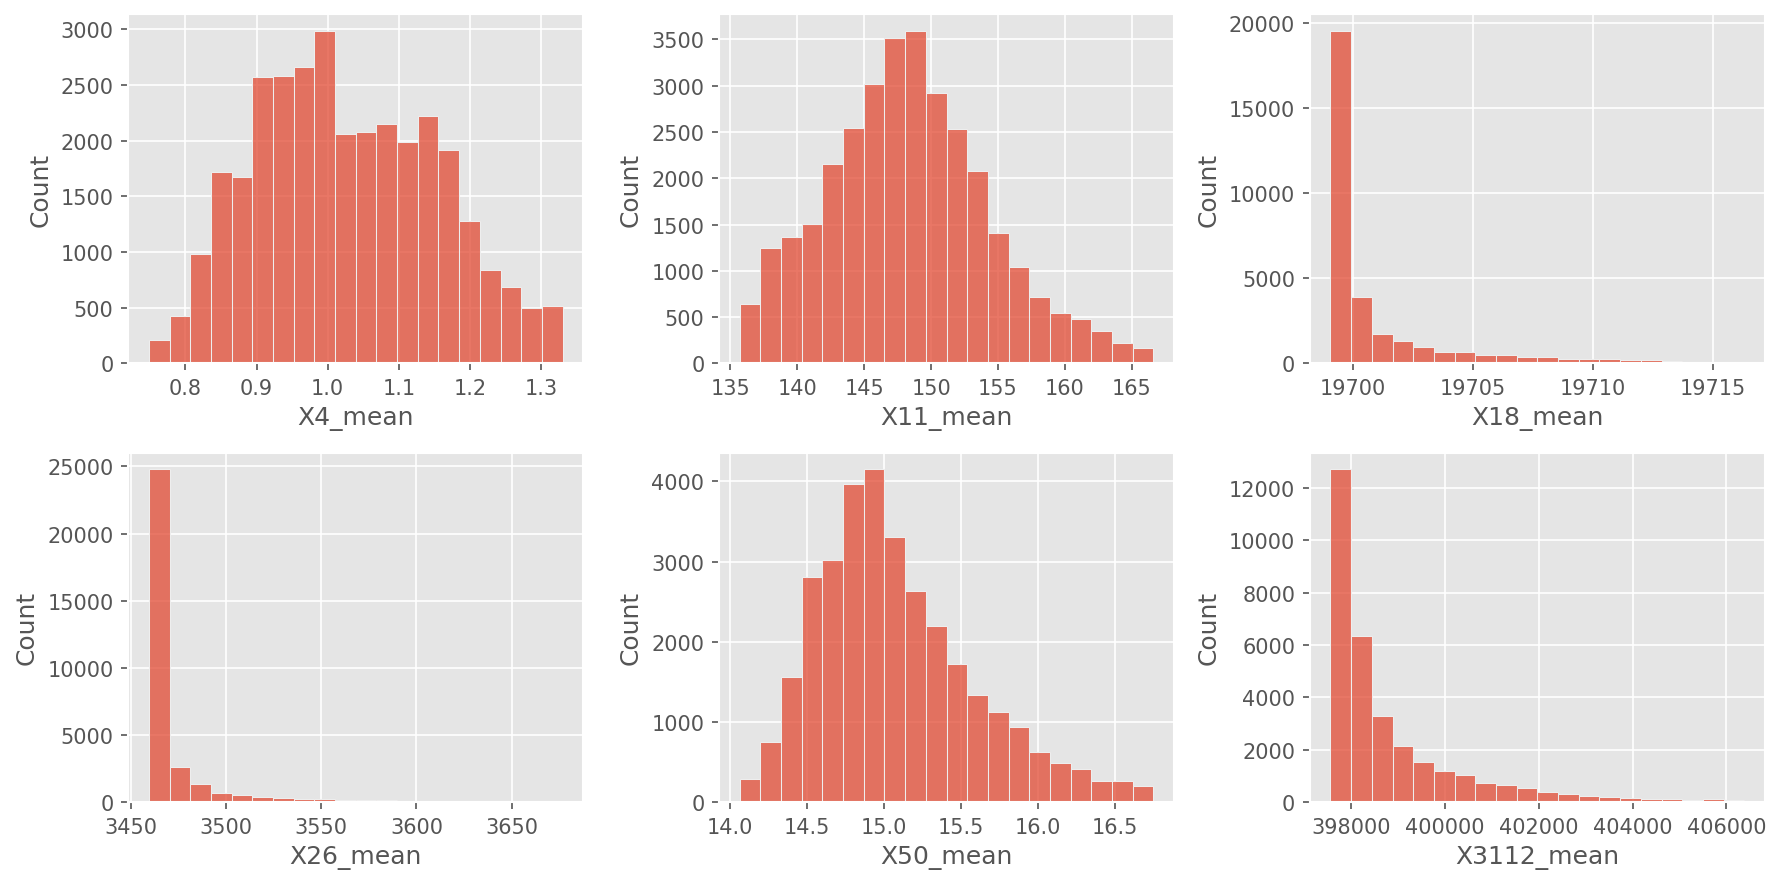

In [93]:
# %%

import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import IPython
from glob import glob
from torch.utils.data import Dataset,DataLoader
from sklearn.model_selection import train_test_split
import tqdm
#import seaborn as sns
import albumentations as A
import torch
import torch.nn as nn
import timm
import torcheval 
import wandb
import torchvision
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import seaborn as sns
from albumentations.pytorch import ToTensorV2
plt.style.use('ggplot')
plt.rcParams.update(**{'figure.dpi':150})
import psutil
import imageio.v3 as imageio

# %%
RANDOM_NUMBER = 42
torch.manual_seed(RANDOM_NUMBER)

# %% [markdown]
# # select Device

# %%
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATA_DIRECTORY = os.path.join(os.getcwd(),"data")
torch.cuda.empty_cache()

# %%
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import scipy as sp

# %%
class Config():

    BASE_DIR = os.path.join(os.getcwd() , 'data')
    train_df = pd.read_csv(BASE_DIR  +  '/train.csv')
    TRAIN_VAL_SPLIT_SIZE = 0.14
    TRAIN_BATCH_SIZE = 128
    VAL_BATCH_SIZE = 128
    TEST_BATCH_SIZE = 3
    LR_MAX = 7e-4 
    NUM_EPOCHS = 20
    TIM_NUM_CLASS = 768 #vit : 512  # swin  
    NORMALIZE_TARGET = "log_transform_mean_std"   #"log_transform" #
    RANDOM_NUMBER = 42
    NUM_FLODS  = 5
    NUM_CLASSES = 6
    TRAITS_NAME = ['X4_mean', 'X11_mean', 'X18_mean', 'X26_mean', 'X50_mean', 'X3112_mean' ]
    FOLD = 0 # Which fold to set as validation data
    IMAGE_SIZE =128
    TARGET_IMAGE_SIZE =  224
    T_MAX =        9
    LR_MODE = "step" # LR scheduler mode from one of "cos", "step", "exp"
    torch.manual_seed(RANDOM_NUMBER)
    INCLUDE_EXTRA_FEATURES = True
    EXTRA_FEATURES_NORMALIZATION = "standard_scalar"  #"min_max_normalization"  #
    WEIGHT_DECAY = 0.01
    TABULAR_NN_OUTPUT  = 256
    TIM_MODEL_NAME = "swin_large" #"efficientnet_v2" # 
    TIMM_FINED_TUNED_WEIGHT = f'{BASE_DIR}/swin_small_fine_tuning.pth'
    Lower_Quantile = 0.005
    Upper_Quantile = 0.98 #0.985
    # use XGBBOOST to find prominant features
    EXTRA_COLOUMN = ['WORLDCLIM_BIO1_annual_mean_temperature',
       'WORLDCLIM_BIO12_annual_precipitation',
       'WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month',
       'WORLDCLIM_BIO15_precipitation_seasonality',
       'WORLDCLIM_BIO4_temperature_seasonality',
       'WORLDCLIM_BIO7_temperature_annual_range',
       'SOIL_bdod_0.5cm_mean_0.01_deg',
       'SOIL_bdod_100.200cm_mean_0.01_deg',
       'SOIL_bdod_15.30cm_mean_0.01_deg',
       'SOIL_bdod_30.60cm_mean_0.01_deg',
       'SOIL_bdod_5.15cm_mean_0.01_deg',
       'SOIL_bdod_60.100cm_mean_0.01_deg', 'SOIL_cec_0.5cm_mean_0.01_deg',
       'SOIL_cec_100.200cm_mean_0.01_deg',
       'SOIL_cec_15.30cm_mean_0.01_deg', 'SOIL_cec_30.60cm_mean_0.01_deg',
       'SOIL_cec_5.15cm_mean_0.01_deg', 'SOIL_cec_60.100cm_mean_0.01_deg',
       'SOIL_cfvo_0.5cm_mean_0.01_deg',
       'SOIL_cfvo_100.200cm_mean_0.01_deg',
       'SOIL_cfvo_15.30cm_mean_0.01_deg',
       'SOIL_cfvo_30.60cm_mean_0.01_deg',
       'SOIL_cfvo_5.15cm_mean_0.01_deg',
       'SOIL_cfvo_60.100cm_mean_0.01_deg',
       'SOIL_clay_0.5cm_mean_0.01_deg',
       'SOIL_clay_100.200cm_mean_0.01_deg',
       'SOIL_clay_15.30cm_mean_0.01_deg',
       'SOIL_clay_30.60cm_mean_0.01_deg',
       'SOIL_clay_5.15cm_mean_0.01_deg',
       'SOIL_clay_60.100cm_mean_0.01_deg',
       'SOIL_nitrogen_0.5cm_mean_0.01_deg',
       'SOIL_nitrogen_100.200cm_mean_0.01_deg',
       'SOIL_nitrogen_15.30cm_mean_0.01_deg',
       'SOIL_nitrogen_30.60cm_mean_0.01_deg',
       'SOIL_nitrogen_5.15cm_mean_0.01_deg',
       'SOIL_nitrogen_60.100cm_mean_0.01_deg',
       'SOIL_ocd_0.5cm_mean_0.01_deg', 'SOIL_ocd_100.200cm_mean_0.01_deg',
       'SOIL_ocd_15.30cm_mean_0.01_deg', 'SOIL_ocd_30.60cm_mean_0.01_deg',
       'SOIL_ocd_5.15cm_mean_0.01_deg', 'SOIL_ocd_60.100cm_mean_0.01_deg',
       'SOIL_ocs_0.30cm_mean_0.01_deg', 'SOIL_phh2o_0.5cm_mean_0.01_deg',
       'SOIL_phh2o_100.200cm_mean_0.01_deg',
       'SOIL_phh2o_15.30cm_mean_0.01_deg',
       'SOIL_phh2o_30.60cm_mean_0.01_deg',
       'SOIL_phh2o_5.15cm_mean_0.01_deg',
       'SOIL_phh2o_60.100cm_mean_0.01_deg',
       'SOIL_sand_0.5cm_mean_0.01_deg',
       'SOIL_sand_100.200cm_mean_0.01_deg',
       'SOIL_sand_15.30cm_mean_0.01_deg',
       'SOIL_sand_30.60cm_mean_0.01_deg',
       'SOIL_sand_5.15cm_mean_0.01_deg',
       'SOIL_sand_60.100cm_mean_0.01_deg',
       'SOIL_silt_0.5cm_mean_0.01_deg',
       'SOIL_silt_100.200cm_mean_0.01_deg',
       'SOIL_silt_15.30cm_mean_0.01_deg',
       'SOIL_silt_30.60cm_mean_0.01_deg',
       'SOIL_silt_5.15cm_mean_0.01_deg',
       'SOIL_silt_60.100cm_mean_0.01_deg', 'SOIL_soc_0.5cm_mean_0.01_deg',
       'SOIL_soc_100.200cm_mean_0.01_deg',
       'SOIL_soc_15.30cm_mean_0.01_deg', 'SOIL_soc_30.60cm_mean_0.01_deg',
       'SOIL_soc_5.15cm_mean_0.01_deg', 'SOIL_soc_60.100cm_mean_0.01_deg',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m1',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m1',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m1',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m10',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m10',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m10',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m10',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m10',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m11',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m11',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m11',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m11',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m11',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m12',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m12',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m12',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m12',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m12',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m2',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m2',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m2',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m2',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m2',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m3',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m3',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m3',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m3',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m3',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m4',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m4',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m4',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m4',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m4',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m5',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m5',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m5',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m5',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m5',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m6',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m6',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m6',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m6',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m6',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m7',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m7',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m7',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m7',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m7',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m8',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m8',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m8',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m8',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m8',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m9',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m9',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_03_._month_m9',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_04_._month_m9',
       'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m9',
       'VOD_C_2002_2018_multiyear_mean_m01',
       'VOD_C_2002_2018_multiyear_mean_m02',
       'VOD_C_2002_2018_multiyear_mean_m03',
       'VOD_C_2002_2018_multiyear_mean_m04',
       'VOD_C_2002_2018_multiyear_mean_m05',
       'VOD_C_2002_2018_multiyear_mean_m06',
       'VOD_C_2002_2018_multiyear_mean_m07',
       'VOD_C_2002_2018_multiyear_mean_m08',
       'VOD_C_2002_2018_multiyear_mean_m09',
       'VOD_C_2002_2018_multiyear_mean_m10',
       'VOD_C_2002_2018_multiyear_mean_m11',
       'VOD_C_2002_2018_multiyear_mean_m12',
       'VOD_Ku_1987_2017_multiyear_mean_m01',
       'VOD_Ku_1987_2017_multiyear_mean_m02',
       'VOD_Ku_1987_2017_multiyear_mean_m03',
       'VOD_Ku_1987_2017_multiyear_mean_m04',
       'VOD_Ku_1987_2017_multiyear_mean_m05',
       'VOD_Ku_1987_2017_multiyear_mean_m06',
       'VOD_Ku_1987_2017_multiyear_mean_m07',
       'VOD_Ku_1987_2017_multiyear_mean_m08',
       'VOD_Ku_1987_2017_multiyear_mean_m09',
       'VOD_Ku_1987_2017_multiyear_mean_m10',
       'VOD_Ku_1987_2017_multiyear_mean_m11',
       'VOD_Ku_1987_2017_multiyear_mean_m12',
       'VOD_X_1997_2018_multiyear_mean_m01',
       'VOD_X_1997_2018_multiyear_mean_m02',
       'VOD_X_1997_2018_multiyear_mean_m03',
       'VOD_X_1997_2018_multiyear_mean_m04',
       'VOD_X_1997_2018_multiyear_mean_m05',
       'VOD_X_1997_2018_multiyear_mean_m06',
       'VOD_X_1997_2018_multiyear_mean_m07',
       'VOD_X_1997_2018_multiyear_mean_m08',
       'VOD_X_1997_2018_multiyear_mean_m09',
       'VOD_X_1997_2018_multiyear_mean_m10',
       'VOD_X_1997_2018_multiyear_mean_m11',
       'VOD_X_1997_2018_multiyear_mean_m12'
       ]

    
    # EXTRA_COLOUMN =['VOD_C_2002_2018_multiyear_mean_m06',
    # 'VOD_C_2002_2018_multiyear_mean_m01',
    # 'SOIL_nitrogen_100.200cm_mean_0.01_deg',
    # 'SOIL_nitrogen_0.5cm_mean_0.01_deg',
    # 'SOIL_soc_0.5cm_mean_0.01_deg',
    # 'SOIL_ocd_0.5cm_mean_0.01_deg',
    # 'SOIL_bdod_0.5cm_mean_0.01_deg',
    # 'SOIL_soc_100.200cm_mean_0.01_deg',
    # 'WORLDCLIM_BIO15_precipitation_seasonality',
    # 'SOIL_bdod_100.200cm_mean_0.01_deg',
    # 'SOIL_ocd_100.200cm_mean_0.01_deg',
    # 'SOIL_ocd_30.60cm_mean_0.01_deg',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m1',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m11',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m4',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m5',
    # 'SOIL_phh2o_0.5cm_mean_0.01_deg',
    # 'WORLDCLIM_BIO12_annual_precipitation',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m6',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m10',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_01_._month_m7',
    # 'WORLDCLIM_BIO4_temperature_seasonality',
    # 'WORLDCLIM_BIO13.BIO14_delta_precipitation_of_wettest_and_dryest_month',
    # 'WORLDCLIM_BIO1_annual_mean_temperature',
    # 'SOIL_cfvo_0.5cm_mean_0.01_deg',
    # 'SOIL_clay_100.200cm_mean_0.01_deg',
    # 'SOIL_clay_0.5cm_mean_0.01_deg',
    # 'SOIL_silt_0.5cm_mean_0.01_deg',
    # 'SOIL_sand_0.5cm_mean_0.01_deg',
    # 'SOIL_cec_15.30cm_mean_0.01_deg',
    # 'SOIL_cec_100.200cm_mean_0.01_deg',
    # 'SOIL_cec_0.5cm_mean_0.01_deg',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m1',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m3',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m1',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m11',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m6',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m10',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m4',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_02_._month_m5',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m5',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m10',
    # 'MODIS_2000.2020_monthly_mean_surface_reflectance_band_05_._month_m4']
    N_TARGETS  =len(TRAITS_NAME)  


CONFIG = Config()

# %%
# wandb.login()
# wandb.init(project="cs680v3",group="swin_tf",name="swin_small_self_fine_tuned",
#         config = {
#     "LR_max": CONFIG.LR_MAX,
#     "WEIGHT_DECAY":CONFIG.WEIGHT_DECAY,
#     "train_batch" : CONFIG.TRAIN_BATCH_SIZE
#     })

# %% [markdown]
# # Preprocessing the Tabular Data And Image Transformation

# %%
# define_transformation for the tabular data
log_tf_col = CONFIG.TRAITS_NAME
scale_feature_col =  CONFIG.EXTRA_COLOUMN + CONFIG.TRAITS_NAME
log_transform = ColumnTransformer(transformers= [
    ('log' , FunctionTransformer( np.log10  , inverse_func=sp.special.exp10, validate=False, check_inverse = True ,feature_names_out='one-to-one') , log_tf_col)
        ] , verbose_feature_names_out=False ,remainder= 'passthrough'
          )
log_transform.set_output(transform='pandas')

std_scale =  ColumnTransformer(transformers=[('scale',StandardScaler() ,scale_feature_col )  ],
                               verbose_feature_names_out=False,
                               remainder='passthrough'
                               )
std_scale.set_output(transform='pandas')
scaling_pipeline = Pipeline(steps=[   
                        ("log" , log_transform),
                        ("std_scale" , std_scale )])



# %%
# preparing the tabular data that has been given 
BASE_DIR = os.path.join(os.getcwd() , 'data')
Train_DF = pd.read_csv(BASE_DIR  +  '/train.csv')
Test_DF =  pd.read_csv(BASE_DIR  +  '/test.csv')
Test_DF[log_tf_col] =1

train_df , val_df = train_test_split(Train_DF,test_size=CONFIG.TRAIN_VAL_SPLIT_SIZE,shuffle=True)
for column in CONFIG.TRAITS_NAME:
    lower_quantile = train_df[column].quantile(CONFIG.Lower_Quantile)
    upper_quantile = train_df[column].quantile(CONFIG.Upper_Quantile)
    train_df = train_df[(train_df[column] >= lower_quantile) & (train_df[column] <= upper_quantile)]

# train_df = train_df[(np.abs(stats.zscore(np.log10(train_df[CONFIG.TRAITS_NAME]))<2).all(axis=1)  )]

print('JPEG Files Processing:')
train_df['file_path'] = train_df['id'].apply(lambda s: f'{BASE_DIR}/train_images/{s}.jpeg')
train_df['jpeg_bytes'] = train_df['file_path'].apply(lambda fp: open(fp, 'rb').read())

val_df['file_path'] = val_df['id'].apply(lambda s: f'{BASE_DIR}/train_images/{s}.jpeg')
val_df['jpeg_bytes'] = val_df['file_path'].apply(lambda fp: open(fp, 'rb').read())

Test_DF['file_path'] = Test_DF['id'].apply(lambda s: f'{BASE_DIR}/test_images/{s}.jpeg')
Test_DF['jpeg_bytes'] = Test_DF['file_path'].apply(lambda fp: open(fp, 'rb').read())
print('JPEG Files Processing End')    


# train_tabular = train_df.drop(columns = ['id'] + CONFIG.TRAITS_NAME)
# val_tabular =    val_df.drop(columns = ['id'] + CONFIG.TRAITS_NAME)
# test_tabular = test.drop(columns = ['id'])

# scaling of the training data !

training_scaling_pipeline = Pipeline(steps=[   
                        ("log" , log_transform),
                        ("std_scale" , std_scale )])

train_tabular_scaled =  training_scaling_pipeline.fit_transform(train_df)
validation_tabular_scaled = training_scaling_pipeline.transform(val_df)

test_tabular_scaled = training_scaling_pipeline.transform(Test_DF)
#Test_DF   = Test_DF.drop(columns= [log_tf_col] )
"inverse"
# tt =   scaling_pipeline['std_scale']['scale'].inverse_transform(train_tabular_scaled[CONFIG.EXTRA_COLOUMN + CONFIG.TRAITS_NAME])
# tt = pd.DataFrame(tt, columns=CONFIG.EXTRA_COLOUMN + CONFIG.TRAITS_NAME)
# tt2 = scaling_pipeline['log']['log'].inverse_transform(tt[CONFIG.TRAITS_NAME])
# tt2  = pd.concat([tt2 ,tt[CONFIG.EXTRA_COLOUMN]],axis=1)                 
                  


# some hyper parameter for lr scheduler
CONFIG.N_TRAIN_SAMPLES = len(train_df)
CONFIG.N_STEPS_PER_EPOCH = (CONFIG.N_TRAIN_SAMPLES // CONFIG.TRAIN_BATCH_SIZE)
CONFIG.N_STEPS = CONFIG.N_STEPS_PER_EPOCH * CONFIG.NUM_EPOCHS + 1   

# %%
# Image PreProcessing

MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]
TRAIN_TRANSFORMS = A.Compose([
    A.Resize(CONFIG.TARGET_IMAGE_SIZE, CONFIG.TARGET_IMAGE_SIZE),
    A.RandomCrop(width=CONFIG.TARGET_IMAGE_SIZE, height=CONFIG.TARGET_IMAGE_SIZE),  # Simulate different crops
    A.HorizontalFlip(p=0.5),  # Simulate left-right flips
    A.VerticalFlip(p=0.5),  # Simulate up-down flips
    A.RandomBrightnessContrast(brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), p=0.5),  # Adjust brightness and contrast
    A.RandomRotate90(p=0.5),  # Simulate different rotations
    A.GaussianBlur(blur_limit=(3, 7), p=0.1),  # Introduce slight blur
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=15, p=0.5),  # Combine shift, scale, and rotation
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.5),  # Adjust hue, saturation, and value
    A.ToFloat(),
    A.Normalize(mean=MEAN, std=STD, max_pixel_value=1),
    ToTensorV2(),
])

# TRAIN_TRANSFORMS = A.Compose([
#     #A.HorizontalFlip(p=0.5),
#     A.Resize(CONFIG.TARGET_IMAGE_SIZE, CONFIG.TARGET_IMAGE_SIZE),
#     #A.RandomBrightnessContrast(brightness_limit=0.1, contrast_limit=0.1, p=0.25),
#     #A.ImageCompression(quality_lower=85, quality_upper=100, p=0.25),
#     A.ToFloat(),
#     A.Normalize(mean=MEAN, std=STD, max_pixel_value=1),
#     ToTensorV2(),
# ])

TEST_TRANSFORMS = A.Compose([
    A.Resize(CONFIG.TARGET_IMAGE_SIZE, CONFIG.TARGET_IMAGE_SIZE),
    A.ToFloat(),
    A.Normalize(mean=MEAN, std=STD, max_pixel_value=1),
    ToTensorV2(),
])


# %% [markdown]
# # Creating the Dataloader for Train , Validation and Testing 

# %%
class create_dataset(Dataset):
    def __init__(self, X_jpeg_bytes, X_tabular, y, transforms=None):
        self.X_jpeg_bytes = X_jpeg_bytes
        self.X_tabular = X_tabular
        self.y = y
        self.transforms = transforms

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        X_sample = self.transforms(
            image=imageio.imread(self.X_jpeg_bytes[index]),
        )['image']
        X_tabular_sample = self.X_tabular[index]
        y_sample = self.y[index]

        return X_sample, X_tabular_sample, y_sample

test_dataset = create_dataset(
    X_jpeg_bytes = test_tabular_scaled['jpeg_bytes'].values,
    X_tabular = test_tabular_scaled[CONFIG.EXTRA_COLOUMN].values.astype(np.float32),
    y = test_tabular_scaled["id"].values,
    transforms= TEST_TRANSFORMS
    )


train_dataset = create_dataset(
    X_jpeg_bytes = train_tabular_scaled['jpeg_bytes'].values,
    X_tabular = train_tabular_scaled[CONFIG.EXTRA_COLOUMN].values.astype(np.float32),
    y = train_tabular_scaled[CONFIG.TRAITS_NAME].values.astype(np.float32),
    transforms= TRAIN_TRANSFORMS
)

validation_dataset = create_dataset(
    X_jpeg_bytes = validation_tabular_scaled['jpeg_bytes'].values,
    X_tabular = validation_tabular_scaled[CONFIG.EXTRA_COLOUMN].values.astype(np.float32),
    y = validation_tabular_scaled[CONFIG.TRAITS_NAME].values.astype(np.float32),
    transforms= TEST_TRANSFORMS
)

train_dataloader = DataLoader(
    train_dataset,
    batch_size=CONFIG.TRAIN_BATCH_SIZE,
    shuffle=True,
    drop_last=True,
    num_workers=0#psutil.cpu_count(),
)

validation_dataloader = DataLoader(
    validation_dataset,
    batch_size=CONFIG.VAL_BATCH_SIZE,
    shuffle=False,
    drop_last=False,
    num_workers= 0 #psutil.cpu_count(),
)

test_dataset = create_dataset(
    X_jpeg_bytes = test_tabular_scaled['jpeg_bytes'].values,
    X_tabular = test_tabular_scaled[CONFIG.EXTRA_COLOUMN].values.astype(np.float32),
    y = test_tabular_scaled["id"].values,
    transforms= TEST_TRANSFORMS
    )

test_dataloader = DataLoader(
    test_dataset,
    batch_size=CONFIG.TEST_BATCH_SIZE,
    shuffle=False,
    drop_last=False,
    num_workers= 0 #psutil.cpu_count(),
)

# %%
# histograms after filtering out bad observations
n_rows = 2
n_cols = 3
fig, axs = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))
for i, column in enumerate(CONFIG.TRAITS_NAME):
    row_idx, col_idx = divmod(i, n_cols)
    _ = sns.histplot(data=train_df, x=column, ax=axs[row_idx, col_idx], bins=20)

fig.tight_layout()

# %% [markdown]
# # Defining the MODEL
# 
# # Define the Image Backbone and Tabular Model






In [116]:

# %%
class ImageBackbone_swin(nn.Module):
    def __init__(self, fixed_feature_extractor=True):
        super().__init__()
        self.out_features = 356
        self.backbone =timm.create_model('swin_tiny_patch4_window7_224.ms_in22k', pretrained=False, num_classes=CONFIG.N_TARGETS) # timm.create_model('swin_large_patch4_window12_384.ms_in22k_ft_in1k', pretrained=True, num_classes=CONFIG.N_TARGETS)
        #self.backbone.load_state_dict(torch.load(weight_path))
        if fixed_feature_extractor:
            for param in self.backbone.parameters():
                param.requires_grad = False
        in_features = self.backbone.num_features
        
        self.backbone.head = nn.Identity()
        self.head = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(in_features, 356),
        )

    def forward(self, x):
        x = self.backbone(x)
        #print(x.shape)
        x = x.permute(0, 3, 1, 2)
        return self.head(x)
    
    

In [117]:
md = ImageBackbone_swin()
img = torch.ones(4,3,CONFIG.TARGET_IMAGE_SIZE,CONFIG.TARGET_IMAGE_SIZE)
md(img).shape

torch.Size([4, 356])

In [118]:

class ImageBackbone_swin(nn.Module):
    def __init__(self, backbone_name, weight_path, out_features, fixed_feature_extractor=False):
        super().__init__()
        self.out_features = out_features
        self.backbone =timm.create_model('swin_tiny_patch4_window7_224.ms_in22k', pretrained=False, num_classes=CONFIG.N_TARGETS) # timm.create_model('swin_large_patch4_window12_384.ms_in22k_ft_in1k', pretrained=True, num_classes=CONFIG.N_TARGETS)
        #self.backbone.load_state_dict(torch.load(weight_path))
        if fixed_feature_extractor:
            for param in self.backbone.parameters():
                param.requires_grad = False
        in_features = self.backbone.num_features
        
        self.backbone.head = nn.Identity()
        self.head = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(in_features, out_features),
        )

    def forward(self, x):
        x = self.backbone(x)
        #print(x.shape)
        x = x.permute(0, 3, 1, 2)
        return self.head(x)
    
    
class ImageBackbone_dinoV2(nn.Module):
    def __init__(self, backbone_name, weight_path, out_features, fixed_feature_extractor=False):
        super().__init__()
        self.out_features = out_features
        self.backbone = timm.create_model('vit_large_patch14_dinov2.lvd142m', pretrained=True, num_classes=0) #remove classifier nn.Linear
        #self.backbone = backbone_.forward_head(backbone_, pre_logits=True)
        if fixed_feature_extractor:
            for param in self.backbone.parameters():
                param.requires_grad = False
        in_features = self.backbone.num_features
        self.backbone.forward_head= nn.Identity()
        self.head = nn.Sequential(
            nn.AdaptiveAvgPool1d(out_features),
            #nn.Flatten(),
            # nn.Linear(in_features, out_features),
        )

    def forward(self, x):
        x = self.backbone(x)
        #print(x.shape)
        x = x[:,  None,:]
        #print(x.shape)
        tt = self.head(x)
        #print(tt.shape)
        return tt

class TabularBackbone(nn.Module):
    def __init__(self, n_features, out_features):
        super().__init__()
        self.out_features = out_features
        self.fc = nn.Sequential(
            nn.Linear(n_features, 128),
            nn.BatchNorm1d(128),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(128, out_features),
        )

    def forward(self, x):
        return self.fc(x)    



# %% [markdown]
# # Combine the image feature extraction model with tabular feature extraction model 

# %%
def initialize_timm_model( model_name   , tim_num_class=0.0, fine_tuned_weight = None,fixed_feature_extractor=False):
    model_ft  = None
    if model_name == "resnet34" :
        """ Resnet34 """
        model = timm.create_model('resnet34' , num_classes=tim_num_class )
        return model
    if model_name == "Swin_Transformer":
        model = timm.create_model('swin_tiny_patch4_window7_224.ms_in22k' , pretrained=True , num_classes = tim_num_class)
        return model 
    if model_name == "swin_large":
        if fine_tuned_weight!=None:
            model = ImageBackbone_swin(model_name,fine_tuned_weight , tim_num_class,fixed_feature_extractor)
        else:
            model = None #timm.create_model('swin_large_patch4_window12_384.ms_in22k_ft_in1k',pretrained=True, num_classes = tim_num_class)
            #model.load_state_dict(torch.load(weight_path))
            model.head.drop = nn.Dropout(p=0.1,inplace=False)
        return model
    if model_name =="convnextv2":
        model = timm.create_model('convnext_tiny.in12k_ft_in1k_384',num_classes=tim_num_class)
        return model     
    if model_name == "efficientnet_v2":
        model = timm.create_model("efficientnet_b2.ra_in1k",pretrained = True)
        model.classifier = nn.Dropout(p=0.2,inplace=False)
        return model
    if model_name == "dinoV2":
        model = ImageBackbone_dinoV2(model_name,weight_path=None , out_features=tim_num_class,fixed_feature_extractor=fixed_feature_extractor)
        return model


# tm_model = initialize_timm_model("swin_large",tim_num_class=CONFIG.TIM_NUM_CLASS)
# data_config = timm.data.resolve_model_data_config(tm_model)
# transforms = timm.data.create_transform(**data_config, is_training=True)


# %%
class CustomModel(nn.Module):
    def __init__(self,input_channels,out_channels, target_features_num , tim_num_class , model_name):
        super().__init__()
        self.img_backbone =  ImageBackbone_swin(backbone_name=model_name,weight_path =CONFIG.TIMM_FINED_TUNED_WEIGHT , out_features=tim_num_class,fixed_feature_extractor=True)
        self.extra_features_model = TabularBackbone(n_features  = len(CONFIG.EXTRA_COLOUMN) , out_features=64)
        self.fc = nn.Sequential(
            nn.Linear(self.extra_features_model.out_features + self.img_backbone.out_features, 256),  #1024
            nn.BatchNorm1d(256),
            nn.GELU(),
            nn.Dropout(0.1),
            nn.Linear(256, 128), #256
            nn.BatchNorm1d(128),
            nn.GELU(),
            #nn.Dropout(0.1),
            nn.Linear(128, target_features_num),
        )        
    def forward(self,image,x):
        output_image = self.img_backbone(image) # bach * (hight*col)
        z = self.extra_features_model(x) # batch * 16
        inputs  = torch.cat((output_image,z), 1 )
        output = self.fc(inputs)
        return output
class BestModelSaveCallback:
    def __init__(self, save_path):
        self.save_path = save_path
        self.best_accuracy = -1

    def __call__(self, accuracy,model):
        if accuracy > self.best_accuracy:
            self.best_accuracy = accuracy
            model.to(device = "cpu")
            torch.save(model.state_dict(), self.save_path)
            model.to(device=DEVICE)

model = CustomModel(input_channels = len(CONFIG.EXTRA_COLOUMN) ,out_channels =CONFIG.TABULAR_NN_OUTPUT, target_features_num= len(CONFIG.TRAITS_NAME), tim_num_class=CONFIG.TIM_NUM_CLASS , model_name=CONFIG.TIM_MODEL_NAME)
model.to(device = DEVICE)


CustomModel(
  (img_backbone): ImageBackbone_swin(
    (backbone): SwinTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (norm): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
      )
      (layers): Sequential(
        (0): SwinTransformerStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): SwinTransformerBlock(
              (norm1): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (attn): WindowAttention(
                (qkv): Linear(in_features=96, out_features=288, bias=True)
                (attn_drop): Dropout(p=0.0, inplace=False)
                (proj): Linear(in_features=96, out_features=96, bias=True)
                (proj_drop): Dropout(p=0.0, inplace=False)
                (softmax): Softmax(dim=-1)
              )
              (drop_path1): Identity()
              (norm2): LayerNorm((96,), eps=1e-05, elementwise_affine=True)
              (

# submission 

In [119]:
Test_DF   = Test_DF.drop(columns= [log_tf_col] )
"inverse"
# tt =   scaling_pipeline['std_scale']['scale'].inverse_transform(train_tabular_scaled[CONFIG.EXTRA_COLOUMN + CONFIG.TRAITS_NAME])
# tt = pd.DataFrame(tt, columns=CONFIG.EXTRA_COLOUMN + CONFIG.TRAITS_NAME)
# tt2 = scaling_pipeline['log']['log'].inverse_transform(tt[CONFIG.TRAITS_NAME])
# tt2  = pd.concat([tt2 ,tt[CONFIG.EXTRA_COLOUMN]],axis=1)        

KeyError: "[('X4_mean', 'X11_mean', 'X18_mean', 'X26_mean', 'X50_mean', 'X3112_mean')] not found in axis"

In [120]:

t1 = torch.ones((5,3,CONFIG.TARGET_IMAGE_SIZE,CONFIG.TARGET_IMAGE_SIZE)).to(DEVICE)
t2 = torch.ones((5,len(CONFIG.EXTRA_COLOUMN) )).to(DEVICE)
model.eval()
pred = model(t1,t2)
pred  = pred.detach().cpu().numpy()
pred_pd = pd.DataFrame(columns=CONFIG.EXTRA_COLOUMN + CONFIG.TRAITS_NAME)
pred_pd[CONFIG.EXTRA_COLOUMN] =-1
pred_pd[CONFIG.TRAITS_NAME] = pred 

temp1 =   scaling_pipeline['std_scale']['scale'].inverse_transform(pred_pd)
temp2=    pd.DataFrame(temp1, columns=CONFIG.EXTRA_COLOUMN + CONFIG.TRAITS_NAME)
pred_final =   scaling_pipeline['log']['log'].inverse_transform(temp2[CONFIG.TRAITS_NAME])
      

In [121]:
pred_final

,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean
0,1.021605,148.260167,19700.797461,3473.75023,15.01455,398784.548232
1,1.021605,148.260167,19700.797461,3473.75023,15.01455,398784.548232
2,1.021605,148.260167,19700.797461,3473.75023,15.01455,398784.548232
3,1.021605,148.260167,19700.797461,3473.75023,15.01455,398784.548232
4,1.021605,148.260167,19700.797461,3473.75023,15.01455,398784.548232


In [122]:
pred

array([[ 0.0187778 ,  0.01672678, -0.06355063,  0.06315523, -0.10971509,
        -0.02727856],
       [ 0.0187778 ,  0.01672678, -0.06355063,  0.06315523, -0.10971509,
        -0.02727856],
       [ 0.0187778 ,  0.01672678, -0.06355063,  0.06315523, -0.10971509,
        -0.02727856],
       [ 0.0187778 ,  0.01672678, -0.06355063,  0.06315523, -0.10971509,
        -0.02727856],
       [ 0.0187778 ,  0.01672678, -0.06355063,  0.06315523, -0.10971509,
        -0.02727856]], dtype=float32)

In [123]:
class create_dataset(Dataset):
    def __init__(self, X_jpeg_bytes, X_tabular, y, transforms=None):
        self.X_jpeg_bytes = X_jpeg_bytes
        self.X_tabular = X_tabular
        self.y = y
        self.transforms = transforms

    def __len__(self):
        return len(self.y)

    def __getitem__(self, index):
        X_sample = self.transforms(
            image=imageio.imread(self.X_jpeg_bytes[index]),
        )['image']
        X_tabular_sample = self.X_tabular[index]
        y_sample = self.y[index]

        return X_sample, X_tabular_sample, y_sample

test_dataset = create_dataset(
    X_jpeg_bytes = test_tabular_scaled['jpeg_bytes'].values,
    X_tabular = test_tabular_scaled[CONFIG.EXTRA_COLOUMN].values.astype(np.float32),
    y = test_tabular_scaled["id"].values,
    transforms= TEST_TRANSFORMS
    )

test_dataloader = DataLoader(
    test_dataset,
    batch_size=CONFIG.TEST_BATCH_SIZE,
    shuffle=False,
    drop_last=False,
    num_workers= 0 #psutil.cpu_count(),
)

In [174]:

model.eval()
for index , batch in tqdm.tqdm(enumerate(iter(test_dataloader))):
    X_img_test = batch[0] 
    X_features  = batch[1]
    test_id  = batch[2]
    #print(batch) 
    with torch.no_grad():
        #print(X_img_test.shape, X_features.shape)
        y_pred = model(X_img_test.to(DEVICE),X_features.to(DEVICE)).detach().cpu().numpy()
    
        pred_pd = pd.DataFrame(columns=CONFIG.EXTRA_COLOUMN + CONFIG.TRAITS_NAME)
        pred_pd[CONFIG.EXTRA_COLOUMN] =-1
        pred_pd[CONFIG.TRAITS_NAME] = y_pred 

        temp1 =   scaling_pipeline['std_scale']['scale'].inverse_transform(pred_pd)
        temp2=    pd.DataFrame(temp1, columns=CONFIG.EXTRA_COLOUMN + CONFIG.TRAITS_NAME)
        pred_final =   scaling_pipeline['log']['log'].inverse_transform(temp2[CONFIG.TRAITS_NAME])
        #pred_final["id"] = test_id.cpu().detach().numpy()
        submission_df = pd.concat([submission_df, pred_final.assign(id=test_id.cpu().detach().numpy())], ignore_index=True)
submission_df.to_csv('submissionV3.csv', index=False)
print("Submit!")

2131it [01:08, 31.22it/s]

Submit!


In [172]:
submission_df = pd.concat([submission_df, pred_final.assign(id=test_id.cpu().detach().numpy())], ignore_index=True)

/tmp/ipykernel_246353/1109836497.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  submission_df = pd.concat([submission_df, pred_final.assign(id=test_id.cpu().detach().numpy())], ignore_index=True)


In [173]:
submission_df

,id,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean
0,154220505,1.020399,149.020398,19700.827252,3474.336213,15.033296,398742.983030
1,195736552,1.021102,148.780223,19700.853572,3473.745503,15.028507,398735.805361
2,182701773,1.018923,148.926804,19700.840231,3473.914222,15.030674,398746.520257


In [169]:
pred_final.iloc[0]


X4_mean       1.020399e+00
X11_mean      1.490204e+02
X18_mean      1.970083e+04
X26_mean      3.474336e+03
X50_mean      1.503330e+01
X3112_mean    3.987430e+05
id            1.542205e+08
Name: 0, dtype: float64

In [150]:
pred_final =   scaling_pipeline['log']['log'].inverse_transform(temp2[CONFIG.TRAITS_NAME])
pred_final["id"] = test_id.cpu().detach().numpy()

In [156]:
pred_final["id"] = test_id.cpu().detach().numpy()

In [157]:
pred_final

,X4_mean,X11_mean,X18_mean,X26_mean,X50_mean,X3112_mean,id
0,1.020399,149.020398,19700.827252,3474.336213,15.033296,398742.983030,154220505
1,1.021102,148.780223,19700.853572,3473.745503,15.028507,398735.805361,195736552
2,1.018923,148.926804,19700.840231,3473.914222,15.030674,398746.520257,182701773


In [158]:
test_id.cpu().detach().numpy()

array([154220505, 195736552, 182701773])

In [133]:
row

{'id': tensor([104965612]),
 'X4':     X4_mean    X11_mean      X18_mean     X26_mean   X50_mean     X3112_mean
 0  1.019308  149.062361  19700.771366  3474.386001  15.039013  398736.611439,
 'X11':     X4_mean    X11_mean      X18_mean     X26_mean   X50_mean     X3112_mean
 0  1.019308  149.062361  19700.771366  3474.386001  15.039013  398736.611439,
 'X18':     X4_mean    X11_mean      X18_mean     X26_mean   X50_mean     X3112_mean
 0  1.019308  149.062361  19700.771366  3474.386001  15.039013  398736.611439,
 'X26':     X4_mean    X11_mean      X18_mean     X26_mean   X50_mean     X3112_mean
 0  1.019308  149.062361  19700.771366  3474.386001  15.039013  398736.611439,
 'X50':     X4_mean    X11_mean      X18_mean     X26_mean   X50_mean     X3112_mean
 0  1.019308  149.062361  19700.771366  3474.386001  15.039013  398736.611439,
 'X3112':     X4_mean    X11_mean      X18_mean     X26_mean   X50_mean     X3112_mean
 0  1.019308  149.062361  19700.771366  3474.386001  15.039013  39

In [2]:
import torch
import timm

backbone = timm.create_model('swin_large_patch4_window12_384.ms_in22k_ft_in1k', pretrained=False) #remove classifier nn.Linear
backbone.load_state_dict(torch.load("/home/prajwal/cs680/cs680_kaggle/data/swin_large_fine_tuning_to_train.pth"))

/tmp/ipykernel_256725/3012244307.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  backbone.load_state_dict(torch.load("/home/prajwal/cs680/cs680_kaggle/data/swin_large_fi

RuntimeError: Error(s) in loading state_dict for SwinTransformer:
	Missing key(s) in state_dict: "patch_embed.proj.weight", "patch_embed.proj.bias", "patch_embed.norm.weight", "patch_embed.norm.bias", "layers.0.blocks.0.norm1.weight", "layers.0.blocks.0.norm1.bias", "layers.0.blocks.0.attn.relative_position_bias_table", "layers.0.blocks.0.attn.qkv.weight", "layers.0.blocks.0.attn.qkv.bias", "layers.0.blocks.0.attn.proj.weight", "layers.0.blocks.0.attn.proj.bias", "layers.0.blocks.0.norm2.weight", "layers.0.blocks.0.norm2.bias", "layers.0.blocks.0.mlp.fc1.weight", "layers.0.blocks.0.mlp.fc1.bias", "layers.0.blocks.0.mlp.fc2.weight", "layers.0.blocks.0.mlp.fc2.bias", "layers.0.blocks.1.norm1.weight", "layers.0.blocks.1.norm1.bias", "layers.0.blocks.1.attn.relative_position_bias_table", "layers.0.blocks.1.attn.qkv.weight", "layers.0.blocks.1.attn.qkv.bias", "layers.0.blocks.1.attn.proj.weight", "layers.0.blocks.1.attn.proj.bias", "layers.0.blocks.1.norm2.weight", "layers.0.blocks.1.norm2.bias", "layers.0.blocks.1.mlp.fc1.weight", "layers.0.blocks.1.mlp.fc1.bias", "layers.0.blocks.1.mlp.fc2.weight", "layers.0.blocks.1.mlp.fc2.bias", "layers.1.downsample.norm.weight", "layers.1.downsample.norm.bias", "layers.1.downsample.reduction.weight", "layers.1.blocks.0.norm1.weight", "layers.1.blocks.0.norm1.bias", "layers.1.blocks.0.attn.relative_position_bias_table", "layers.1.blocks.0.attn.qkv.weight", "layers.1.blocks.0.attn.qkv.bias", "layers.1.blocks.0.attn.proj.weight", "layers.1.blocks.0.attn.proj.bias", "layers.1.blocks.0.norm2.weight", "layers.1.blocks.0.norm2.bias", "layers.1.blocks.0.mlp.fc1.weight", "layers.1.blocks.0.mlp.fc1.bias", "layers.1.blocks.0.mlp.fc2.weight", "layers.1.blocks.0.mlp.fc2.bias", "layers.1.blocks.1.norm1.weight", "layers.1.blocks.1.norm1.bias", "layers.1.blocks.1.attn.relative_position_bias_table", "layers.1.blocks.1.attn.qkv.weight", "layers.1.blocks.1.attn.qkv.bias", "layers.1.blocks.1.attn.proj.weight", "layers.1.blocks.1.attn.proj.bias", "layers.1.blocks.1.norm2.weight", "layers.1.blocks.1.norm2.bias", "layers.1.blocks.1.mlp.fc1.weight", "layers.1.blocks.1.mlp.fc1.bias", "layers.1.blocks.1.mlp.fc2.weight", "layers.1.blocks.1.mlp.fc2.bias", "layers.2.downsample.norm.weight", "layers.2.downsample.norm.bias", "layers.2.downsample.reduction.weight", "layers.2.blocks.0.norm1.weight", "layers.2.blocks.0.norm1.bias", "layers.2.blocks.0.attn.relative_position_bias_table", "layers.2.blocks.0.attn.qkv.weight", "layers.2.blocks.0.attn.qkv.bias", "layers.2.blocks.0.attn.proj.weight", "layers.2.blocks.0.attn.proj.bias", "layers.2.blocks.0.norm2.weight", "layers.2.blocks.0.norm2.bias", "layers.2.blocks.0.mlp.fc1.weight", "layers.2.blocks.0.mlp.fc1.bias", "layers.2.blocks.0.mlp.fc2.weight", "layers.2.blocks.0.mlp.fc2.bias", "layers.2.blocks.1.norm1.weight", "layers.2.blocks.1.norm1.bias", "layers.2.blocks.1.attn.relative_position_bias_table", "layers.2.blocks.1.attn.qkv.weight", "layers.2.blocks.1.attn.qkv.bias", "layers.2.blocks.1.attn.proj.weight", "layers.2.blocks.1.attn.proj.bias", "layers.2.blocks.1.norm2.weight", "layers.2.blocks.1.norm2.bias", "layers.2.blocks.1.mlp.fc1.weight", "layers.2.blocks.1.mlp.fc1.bias", "layers.2.blocks.1.mlp.fc2.weight", "layers.2.blocks.1.mlp.fc2.bias", "layers.2.blocks.2.norm1.weight", "layers.2.blocks.2.norm1.bias", "layers.2.blocks.2.attn.relative_position_bias_table", "layers.2.blocks.2.attn.qkv.weight", "layers.2.blocks.2.attn.qkv.bias", "layers.2.blocks.2.attn.proj.weight", "layers.2.blocks.2.attn.proj.bias", "layers.2.blocks.2.norm2.weight", "layers.2.blocks.2.norm2.bias", "layers.2.blocks.2.mlp.fc1.weight", "layers.2.blocks.2.mlp.fc1.bias", "layers.2.blocks.2.mlp.fc2.weight", "layers.2.blocks.2.mlp.fc2.bias", "layers.2.blocks.3.norm1.weight", "layers.2.blocks.3.norm1.bias", "layers.2.blocks.3.attn.relative_position_bias_table", "layers.2.blocks.3.attn.qkv.weight", "layers.2.blocks.3.attn.qkv.bias", "layers.2.blocks.3.attn.proj.weight", "layers.2.blocks.3.attn.proj.bias", "layers.2.blocks.3.norm2.weight", "layers.2.blocks.3.norm2.bias", "layers.2.blocks.3.mlp.fc1.weight", "layers.2.blocks.3.mlp.fc1.bias", "layers.2.blocks.3.mlp.fc2.weight", "layers.2.blocks.3.mlp.fc2.bias", "layers.2.blocks.4.norm1.weight", "layers.2.blocks.4.norm1.bias", "layers.2.blocks.4.attn.relative_position_bias_table", "layers.2.blocks.4.attn.qkv.weight", "layers.2.blocks.4.attn.qkv.bias", "layers.2.blocks.4.attn.proj.weight", "layers.2.blocks.4.attn.proj.bias", "layers.2.blocks.4.norm2.weight", "layers.2.blocks.4.norm2.bias", "layers.2.blocks.4.mlp.fc1.weight", "layers.2.blocks.4.mlp.fc1.bias", "layers.2.blocks.4.mlp.fc2.weight", "layers.2.blocks.4.mlp.fc2.bias", "layers.2.blocks.5.norm1.weight", "layers.2.blocks.5.norm1.bias", "layers.2.blocks.5.attn.relative_position_bias_table", "layers.2.blocks.5.attn.qkv.weight", "layers.2.blocks.5.attn.qkv.bias", "layers.2.blocks.5.attn.proj.weight", "layers.2.blocks.5.attn.proj.bias", "layers.2.blocks.5.norm2.weight", "layers.2.blocks.5.norm2.bias", "layers.2.blocks.5.mlp.fc1.weight", "layers.2.blocks.5.mlp.fc1.bias", "layers.2.blocks.5.mlp.fc2.weight", "layers.2.blocks.5.mlp.fc2.bias", "layers.2.blocks.6.norm1.weight", "layers.2.blocks.6.norm1.bias", "layers.2.blocks.6.attn.relative_position_bias_table", "layers.2.blocks.6.attn.qkv.weight", "layers.2.blocks.6.attn.qkv.bias", "layers.2.blocks.6.attn.proj.weight", "layers.2.blocks.6.attn.proj.bias", "layers.2.blocks.6.norm2.weight", "layers.2.blocks.6.norm2.bias", "layers.2.blocks.6.mlp.fc1.weight", "layers.2.blocks.6.mlp.fc1.bias", "layers.2.blocks.6.mlp.fc2.weight", "layers.2.blocks.6.mlp.fc2.bias", "layers.2.blocks.7.norm1.weight", "layers.2.blocks.7.norm1.bias", "layers.2.blocks.7.attn.relative_position_bias_table", "layers.2.blocks.7.attn.qkv.weight", "layers.2.blocks.7.attn.qkv.bias", "layers.2.blocks.7.attn.proj.weight", "layers.2.blocks.7.attn.proj.bias", "layers.2.blocks.7.norm2.weight", "layers.2.blocks.7.norm2.bias", "layers.2.blocks.7.mlp.fc1.weight", "layers.2.blocks.7.mlp.fc1.bias", "layers.2.blocks.7.mlp.fc2.weight", "layers.2.blocks.7.mlp.fc2.bias", "layers.2.blocks.8.norm1.weight", "layers.2.blocks.8.norm1.bias", "layers.2.blocks.8.attn.relative_position_bias_table", "layers.2.blocks.8.attn.qkv.weight", "layers.2.blocks.8.attn.qkv.bias", "layers.2.blocks.8.attn.proj.weight", "layers.2.blocks.8.attn.proj.bias", "layers.2.blocks.8.norm2.weight", "layers.2.blocks.8.norm2.bias", "layers.2.blocks.8.mlp.fc1.weight", "layers.2.blocks.8.mlp.fc1.bias", "layers.2.blocks.8.mlp.fc2.weight", "layers.2.blocks.8.mlp.fc2.bias", "layers.2.blocks.9.norm1.weight", "layers.2.blocks.9.norm1.bias", "layers.2.blocks.9.attn.relative_position_bias_table", "layers.2.blocks.9.attn.qkv.weight", "layers.2.blocks.9.attn.qkv.bias", "layers.2.blocks.9.attn.proj.weight", "layers.2.blocks.9.attn.proj.bias", "layers.2.blocks.9.norm2.weight", "layers.2.blocks.9.norm2.bias", "layers.2.blocks.9.mlp.fc1.weight", "layers.2.blocks.9.mlp.fc1.bias", "layers.2.blocks.9.mlp.fc2.weight", "layers.2.blocks.9.mlp.fc2.bias", "layers.2.blocks.10.norm1.weight", "layers.2.blocks.10.norm1.bias", "layers.2.blocks.10.attn.relative_position_bias_table", "layers.2.blocks.10.attn.qkv.weight", "layers.2.blocks.10.attn.qkv.bias", "layers.2.blocks.10.attn.proj.weight", "layers.2.blocks.10.attn.proj.bias", "layers.2.blocks.10.norm2.weight", "layers.2.blocks.10.norm2.bias", "layers.2.blocks.10.mlp.fc1.weight", "layers.2.blocks.10.mlp.fc1.bias", "layers.2.blocks.10.mlp.fc2.weight", "layers.2.blocks.10.mlp.fc2.bias", "layers.2.blocks.11.norm1.weight", "layers.2.blocks.11.norm1.bias", "layers.2.blocks.11.attn.relative_position_bias_table", "layers.2.blocks.11.attn.qkv.weight", "layers.2.blocks.11.attn.qkv.bias", "layers.2.blocks.11.attn.proj.weight", "layers.2.blocks.11.attn.proj.bias", "layers.2.blocks.11.norm2.weight", "layers.2.blocks.11.norm2.bias", "layers.2.blocks.11.mlp.fc1.weight", "layers.2.blocks.11.mlp.fc1.bias", "layers.2.blocks.11.mlp.fc2.weight", "layers.2.blocks.11.mlp.fc2.bias", "layers.2.blocks.12.norm1.weight", "layers.2.blocks.12.norm1.bias", "layers.2.blocks.12.attn.relative_position_bias_table", "layers.2.blocks.12.attn.qkv.weight", "layers.2.blocks.12.attn.qkv.bias", "layers.2.blocks.12.attn.proj.weight", "layers.2.blocks.12.attn.proj.bias", "layers.2.blocks.12.norm2.weight", "layers.2.blocks.12.norm2.bias", "layers.2.blocks.12.mlp.fc1.weight", "layers.2.blocks.12.mlp.fc1.bias", "layers.2.blocks.12.mlp.fc2.weight", "layers.2.blocks.12.mlp.fc2.bias", "layers.2.blocks.13.norm1.weight", "layers.2.blocks.13.norm1.bias", "layers.2.blocks.13.attn.relative_position_bias_table", "layers.2.blocks.13.attn.qkv.weight", "layers.2.blocks.13.attn.qkv.bias", "layers.2.blocks.13.attn.proj.weight", "layers.2.blocks.13.attn.proj.bias", "layers.2.blocks.13.norm2.weight", "layers.2.blocks.13.norm2.bias", "layers.2.blocks.13.mlp.fc1.weight", "layers.2.blocks.13.mlp.fc1.bias", "layers.2.blocks.13.mlp.fc2.weight", "layers.2.blocks.13.mlp.fc2.bias", "layers.2.blocks.14.norm1.weight", "layers.2.blocks.14.norm1.bias", "layers.2.blocks.14.attn.relative_position_bias_table", "layers.2.blocks.14.attn.qkv.weight", "layers.2.blocks.14.attn.qkv.bias", "layers.2.blocks.14.attn.proj.weight", "layers.2.blocks.14.attn.proj.bias", "layers.2.blocks.14.norm2.weight", "layers.2.blocks.14.norm2.bias", "layers.2.blocks.14.mlp.fc1.weight", "layers.2.blocks.14.mlp.fc1.bias", "layers.2.blocks.14.mlp.fc2.weight", "layers.2.blocks.14.mlp.fc2.bias", "layers.2.blocks.15.norm1.weight", "layers.2.blocks.15.norm1.bias", "layers.2.blocks.15.attn.relative_position_bias_table", "layers.2.blocks.15.attn.qkv.weight", "layers.2.blocks.15.attn.qkv.bias", "layers.2.blocks.15.attn.proj.weight", "layers.2.blocks.15.attn.proj.bias", "layers.2.blocks.15.norm2.weight", "layers.2.blocks.15.norm2.bias", "layers.2.blocks.15.mlp.fc1.weight", "layers.2.blocks.15.mlp.fc1.bias", "layers.2.blocks.15.mlp.fc2.weight", "layers.2.blocks.15.mlp.fc2.bias", "layers.2.blocks.16.norm1.weight", "layers.2.blocks.16.norm1.bias", "layers.2.blocks.16.attn.relative_position_bias_table", "layers.2.blocks.16.attn.qkv.weight", "layers.2.blocks.16.attn.qkv.bias", "layers.2.blocks.16.attn.proj.weight", "layers.2.blocks.16.attn.proj.bias", "layers.2.blocks.16.norm2.weight", "layers.2.blocks.16.norm2.bias", "layers.2.blocks.16.mlp.fc1.weight", "layers.2.blocks.16.mlp.fc1.bias", "layers.2.blocks.16.mlp.fc2.weight", "layers.2.blocks.16.mlp.fc2.bias", "layers.2.blocks.17.norm1.weight", "layers.2.blocks.17.norm1.bias", "layers.2.blocks.17.attn.relative_position_bias_table", "layers.2.blocks.17.attn.qkv.weight", "layers.2.blocks.17.attn.qkv.bias", "layers.2.blocks.17.attn.proj.weight", "layers.2.blocks.17.attn.proj.bias", "layers.2.blocks.17.norm2.weight", "layers.2.blocks.17.norm2.bias", "layers.2.blocks.17.mlp.fc1.weight", "layers.2.blocks.17.mlp.fc1.bias", "layers.2.blocks.17.mlp.fc2.weight", "layers.2.blocks.17.mlp.fc2.bias", "layers.3.downsample.norm.weight", "layers.3.downsample.norm.bias", "layers.3.downsample.reduction.weight", "layers.3.blocks.0.norm1.weight", "layers.3.blocks.0.norm1.bias", "layers.3.blocks.0.attn.relative_position_bias_table", "layers.3.blocks.0.attn.qkv.weight", "layers.3.blocks.0.attn.qkv.bias", "layers.3.blocks.0.attn.proj.weight", "layers.3.blocks.0.attn.proj.bias", "layers.3.blocks.0.norm2.weight", "layers.3.blocks.0.norm2.bias", "layers.3.blocks.0.mlp.fc1.weight", "layers.3.blocks.0.mlp.fc1.bias", "layers.3.blocks.0.mlp.fc2.weight", "layers.3.blocks.0.mlp.fc2.bias", "layers.3.blocks.1.norm1.weight", "layers.3.blocks.1.norm1.bias", "layers.3.blocks.1.attn.relative_position_bias_table", "layers.3.blocks.1.attn.qkv.weight", "layers.3.blocks.1.attn.qkv.bias", "layers.3.blocks.1.attn.proj.weight", "layers.3.blocks.1.attn.proj.bias", "layers.3.blocks.1.norm2.weight", "layers.3.blocks.1.norm2.bias", "layers.3.blocks.1.mlp.fc1.weight", "layers.3.blocks.1.mlp.fc1.bias", "layers.3.blocks.1.mlp.fc2.weight", "layers.3.blocks.1.mlp.fc2.bias", "norm.weight", "norm.bias", "head.fc.weight", "head.fc.bias". 
	Unexpected key(s) in state_dict: "img_backbone.backbone.patch_embed.proj.weight", "img_backbone.backbone.patch_embed.proj.bias", "img_backbone.backbone.patch_embed.norm.weight", "img_backbone.backbone.patch_embed.norm.bias", "img_backbone.backbone.layers.0.blocks.0.norm1.weight", "img_backbone.backbone.layers.0.blocks.0.norm1.bias", "img_backbone.backbone.layers.0.blocks.0.attn.relative_position_bias_table", "img_backbone.backbone.layers.0.blocks.0.attn.qkv.weight", "img_backbone.backbone.layers.0.blocks.0.attn.qkv.bias", "img_backbone.backbone.layers.0.blocks.0.attn.proj.weight", "img_backbone.backbone.layers.0.blocks.0.attn.proj.bias", "img_backbone.backbone.layers.0.blocks.0.norm2.weight", "img_backbone.backbone.layers.0.blocks.0.norm2.bias", "img_backbone.backbone.layers.0.blocks.0.mlp.fc1.weight", "img_backbone.backbone.layers.0.blocks.0.mlp.fc1.bias", "img_backbone.backbone.layers.0.blocks.0.mlp.fc2.weight", "img_backbone.backbone.layers.0.blocks.0.mlp.fc2.bias", "img_backbone.backbone.layers.0.blocks.1.norm1.weight", "img_backbone.backbone.layers.0.blocks.1.norm1.bias", "img_backbone.backbone.layers.0.blocks.1.attn.relative_position_bias_table", "img_backbone.backbone.layers.0.blocks.1.attn.qkv.weight", "img_backbone.backbone.layers.0.blocks.1.attn.qkv.bias", "img_backbone.backbone.layers.0.blocks.1.attn.proj.weight", "img_backbone.backbone.layers.0.blocks.1.attn.proj.bias", "img_backbone.backbone.layers.0.blocks.1.norm2.weight", "img_backbone.backbone.layers.0.blocks.1.norm2.bias", "img_backbone.backbone.layers.0.blocks.1.mlp.fc1.weight", "img_backbone.backbone.layers.0.blocks.1.mlp.fc1.bias", "img_backbone.backbone.layers.0.blocks.1.mlp.fc2.weight", "img_backbone.backbone.layers.0.blocks.1.mlp.fc2.bias", "img_backbone.backbone.layers.1.downsample.norm.weight", "img_backbone.backbone.layers.1.downsample.norm.bias", "img_backbone.backbone.layers.1.downsample.reduction.weight", "img_backbone.backbone.layers.1.blocks.0.norm1.weight", "img_backbone.backbone.layers.1.blocks.0.norm1.bias", "img_backbone.backbone.layers.1.blocks.0.attn.relative_position_bias_table", "img_backbone.backbone.layers.1.blocks.0.attn.qkv.weight", "img_backbone.backbone.layers.1.blocks.0.attn.qkv.bias", "img_backbone.backbone.layers.1.blocks.0.attn.proj.weight", "img_backbone.backbone.layers.1.blocks.0.attn.proj.bias", "img_backbone.backbone.layers.1.blocks.0.norm2.weight", "img_backbone.backbone.layers.1.blocks.0.norm2.bias", "img_backbone.backbone.layers.1.blocks.0.mlp.fc1.weight", "img_backbone.backbone.layers.1.blocks.0.mlp.fc1.bias", "img_backbone.backbone.layers.1.blocks.0.mlp.fc2.weight", "img_backbone.backbone.layers.1.blocks.0.mlp.fc2.bias", "img_backbone.backbone.layers.1.blocks.1.norm1.weight", "img_backbone.backbone.layers.1.blocks.1.norm1.bias", "img_backbone.backbone.layers.1.blocks.1.attn.relative_position_bias_table", "img_backbone.backbone.layers.1.blocks.1.attn.qkv.weight", "img_backbone.backbone.layers.1.blocks.1.attn.qkv.bias", "img_backbone.backbone.layers.1.blocks.1.attn.proj.weight", "img_backbone.backbone.layers.1.blocks.1.attn.proj.bias", "img_backbone.backbone.layers.1.blocks.1.norm2.weight", "img_backbone.backbone.layers.1.blocks.1.norm2.bias", "img_backbone.backbone.layers.1.blocks.1.mlp.fc1.weight", "img_backbone.backbone.layers.1.blocks.1.mlp.fc1.bias", "img_backbone.backbone.layers.1.blocks.1.mlp.fc2.weight", "img_backbone.backbone.layers.1.blocks.1.mlp.fc2.bias", "img_backbone.backbone.layers.2.downsample.norm.weight", "img_backbone.backbone.layers.2.downsample.norm.bias", "img_backbone.backbone.layers.2.downsample.reduction.weight", "img_backbone.backbone.layers.2.blocks.0.norm1.weight", "img_backbone.backbone.layers.2.blocks.0.norm1.bias", "img_backbone.backbone.layers.2.blocks.0.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.0.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.0.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.0.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.0.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.0.norm2.weight", "img_backbone.backbone.layers.2.blocks.0.norm2.bias", "img_backbone.backbone.layers.2.blocks.0.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.0.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.0.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.0.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.1.norm1.weight", "img_backbone.backbone.layers.2.blocks.1.norm1.bias", "img_backbone.backbone.layers.2.blocks.1.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.1.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.1.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.1.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.1.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.1.norm2.weight", "img_backbone.backbone.layers.2.blocks.1.norm2.bias", "img_backbone.backbone.layers.2.blocks.1.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.1.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.1.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.1.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.2.norm1.weight", "img_backbone.backbone.layers.2.blocks.2.norm1.bias", "img_backbone.backbone.layers.2.blocks.2.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.2.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.2.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.2.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.2.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.2.norm2.weight", "img_backbone.backbone.layers.2.blocks.2.norm2.bias", "img_backbone.backbone.layers.2.blocks.2.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.2.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.2.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.2.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.3.norm1.weight", "img_backbone.backbone.layers.2.blocks.3.norm1.bias", "img_backbone.backbone.layers.2.blocks.3.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.3.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.3.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.3.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.3.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.3.norm2.weight", "img_backbone.backbone.layers.2.blocks.3.norm2.bias", "img_backbone.backbone.layers.2.blocks.3.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.3.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.3.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.3.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.4.norm1.weight", "img_backbone.backbone.layers.2.blocks.4.norm1.bias", "img_backbone.backbone.layers.2.blocks.4.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.4.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.4.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.4.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.4.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.4.norm2.weight", "img_backbone.backbone.layers.2.blocks.4.norm2.bias", "img_backbone.backbone.layers.2.blocks.4.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.4.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.4.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.4.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.5.norm1.weight", "img_backbone.backbone.layers.2.blocks.5.norm1.bias", "img_backbone.backbone.layers.2.blocks.5.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.5.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.5.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.5.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.5.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.5.norm2.weight", "img_backbone.backbone.layers.2.blocks.5.norm2.bias", "img_backbone.backbone.layers.2.blocks.5.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.5.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.5.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.5.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.6.norm1.weight", "img_backbone.backbone.layers.2.blocks.6.norm1.bias", "img_backbone.backbone.layers.2.blocks.6.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.6.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.6.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.6.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.6.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.6.norm2.weight", "img_backbone.backbone.layers.2.blocks.6.norm2.bias", "img_backbone.backbone.layers.2.blocks.6.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.6.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.6.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.6.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.7.norm1.weight", "img_backbone.backbone.layers.2.blocks.7.norm1.bias", "img_backbone.backbone.layers.2.blocks.7.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.7.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.7.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.7.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.7.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.7.norm2.weight", "img_backbone.backbone.layers.2.blocks.7.norm2.bias", "img_backbone.backbone.layers.2.blocks.7.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.7.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.7.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.7.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.8.norm1.weight", "img_backbone.backbone.layers.2.blocks.8.norm1.bias", "img_backbone.backbone.layers.2.blocks.8.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.8.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.8.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.8.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.8.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.8.norm2.weight", "img_backbone.backbone.layers.2.blocks.8.norm2.bias", "img_backbone.backbone.layers.2.blocks.8.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.8.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.8.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.8.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.9.norm1.weight", "img_backbone.backbone.layers.2.blocks.9.norm1.bias", "img_backbone.backbone.layers.2.blocks.9.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.9.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.9.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.9.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.9.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.9.norm2.weight", "img_backbone.backbone.layers.2.blocks.9.norm2.bias", "img_backbone.backbone.layers.2.blocks.9.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.9.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.9.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.9.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.10.norm1.weight", "img_backbone.backbone.layers.2.blocks.10.norm1.bias", "img_backbone.backbone.layers.2.blocks.10.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.10.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.10.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.10.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.10.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.10.norm2.weight", "img_backbone.backbone.layers.2.blocks.10.norm2.bias", "img_backbone.backbone.layers.2.blocks.10.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.10.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.10.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.10.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.11.norm1.weight", "img_backbone.backbone.layers.2.blocks.11.norm1.bias", "img_backbone.backbone.layers.2.blocks.11.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.11.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.11.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.11.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.11.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.11.norm2.weight", "img_backbone.backbone.layers.2.blocks.11.norm2.bias", "img_backbone.backbone.layers.2.blocks.11.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.11.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.11.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.11.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.12.norm1.weight", "img_backbone.backbone.layers.2.blocks.12.norm1.bias", "img_backbone.backbone.layers.2.blocks.12.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.12.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.12.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.12.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.12.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.12.norm2.weight", "img_backbone.backbone.layers.2.blocks.12.norm2.bias", "img_backbone.backbone.layers.2.blocks.12.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.12.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.12.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.12.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.13.norm1.weight", "img_backbone.backbone.layers.2.blocks.13.norm1.bias", "img_backbone.backbone.layers.2.blocks.13.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.13.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.13.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.13.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.13.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.13.norm2.weight", "img_backbone.backbone.layers.2.blocks.13.norm2.bias", "img_backbone.backbone.layers.2.blocks.13.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.13.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.13.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.13.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.14.norm1.weight", "img_backbone.backbone.layers.2.blocks.14.norm1.bias", "img_backbone.backbone.layers.2.blocks.14.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.14.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.14.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.14.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.14.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.14.norm2.weight", "img_backbone.backbone.layers.2.blocks.14.norm2.bias", "img_backbone.backbone.layers.2.blocks.14.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.14.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.14.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.14.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.15.norm1.weight", "img_backbone.backbone.layers.2.blocks.15.norm1.bias", "img_backbone.backbone.layers.2.blocks.15.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.15.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.15.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.15.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.15.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.15.norm2.weight", "img_backbone.backbone.layers.2.blocks.15.norm2.bias", "img_backbone.backbone.layers.2.blocks.15.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.15.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.15.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.15.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.16.norm1.weight", "img_backbone.backbone.layers.2.blocks.16.norm1.bias", "img_backbone.backbone.layers.2.blocks.16.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.16.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.16.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.16.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.16.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.16.norm2.weight", "img_backbone.backbone.layers.2.blocks.16.norm2.bias", "img_backbone.backbone.layers.2.blocks.16.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.16.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.16.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.16.mlp.fc2.bias", "img_backbone.backbone.layers.2.blocks.17.norm1.weight", "img_backbone.backbone.layers.2.blocks.17.norm1.bias", "img_backbone.backbone.layers.2.blocks.17.attn.relative_position_bias_table", "img_backbone.backbone.layers.2.blocks.17.attn.qkv.weight", "img_backbone.backbone.layers.2.blocks.17.attn.qkv.bias", "img_backbone.backbone.layers.2.blocks.17.attn.proj.weight", "img_backbone.backbone.layers.2.blocks.17.attn.proj.bias", "img_backbone.backbone.layers.2.blocks.17.norm2.weight", "img_backbone.backbone.layers.2.blocks.17.norm2.bias", "img_backbone.backbone.layers.2.blocks.17.mlp.fc1.weight", "img_backbone.backbone.layers.2.blocks.17.mlp.fc1.bias", "img_backbone.backbone.layers.2.blocks.17.mlp.fc2.weight", "img_backbone.backbone.layers.2.blocks.17.mlp.fc2.bias", "img_backbone.backbone.layers.3.downsample.norm.weight", "img_backbone.backbone.layers.3.downsample.norm.bias", "img_backbone.backbone.layers.3.downsample.reduction.weight", "img_backbone.backbone.layers.3.blocks.0.norm1.weight", "img_backbone.backbone.layers.3.blocks.0.norm1.bias", "img_backbone.backbone.layers.3.blocks.0.attn.relative_position_bias_table", "img_backbone.backbone.layers.3.blocks.0.attn.qkv.weight", "img_backbone.backbone.layers.3.blocks.0.attn.qkv.bias", "img_backbone.backbone.layers.3.blocks.0.attn.proj.weight", "img_backbone.backbone.layers.3.blocks.0.attn.proj.bias", "img_backbone.backbone.layers.3.blocks.0.norm2.weight", "img_backbone.backbone.layers.3.blocks.0.norm2.bias", "img_backbone.backbone.layers.3.blocks.0.mlp.fc1.weight", "img_backbone.backbone.layers.3.blocks.0.mlp.fc1.bias", "img_backbone.backbone.layers.3.blocks.0.mlp.fc2.weight", "img_backbone.backbone.layers.3.blocks.0.mlp.fc2.bias", "img_backbone.backbone.layers.3.blocks.1.norm1.weight", "img_backbone.backbone.layers.3.blocks.1.norm1.bias", "img_backbone.backbone.layers.3.blocks.1.attn.relative_position_bias_table", "img_backbone.backbone.layers.3.blocks.1.attn.qkv.weight", "img_backbone.backbone.layers.3.blocks.1.attn.qkv.bias", "img_backbone.backbone.layers.3.blocks.1.attn.proj.weight", "img_backbone.backbone.layers.3.blocks.1.attn.proj.bias", "img_backbone.backbone.layers.3.blocks.1.norm2.weight", "img_backbone.backbone.layers.3.blocks.1.norm2.bias", "img_backbone.backbone.layers.3.blocks.1.mlp.fc1.weight", "img_backbone.backbone.layers.3.blocks.1.mlp.fc1.bias", "img_backbone.backbone.layers.3.blocks.1.mlp.fc2.weight", "img_backbone.backbone.layers.3.blocks.1.mlp.fc2.bias", "img_backbone.backbone.norm.weight", "img_backbone.backbone.norm.bias", "img_backbone.backbone.head.fc.weight", "img_backbone.backbone.head.fc.bias". 

In [3]:
tt = torch.load("/home/prajwal/cs680/cs680_kaggle/data/swin_large_fine_tuning_to_train.pth")

/tmp/ipykernel_256725/4216845117.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  tt = torch.load("/home/prajwal/cs680/cs680_kaggle/data/swin_large_fine_tuning_to_train.p

In [10]:
tt['patch_embed.proj.weight']

KeyError: 'patch_embed.proj.weight'